In [1]:
import pandas as pd
import numpy as np

# DF 다루기 실습

In [2]:
# import shutil
# shutil.move('C:/Users/i7B/Downloads/CCTV_in_Seoul.csv','CCTV_in_Seoul.csv')
# shutil.move('C:/Users/i7B/Downloads/population_in_Seoul.xls','population_in_Seoul.xls')

In [3]:
from IPython.display import display_html
def display_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

## 전처리

- 불러오기

In [4]:
df_cctv=pd.read_csv('CCTV_in_Seoul.csv')

In [5]:
df_cctv.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


- 열이름변경

In [6]:
df_cctv.rename(columns={'기관명':'구별'},inplace=True)

In [7]:
df_cctv.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


- 특정 컬럼만 선택해서 불러오기(엑셀)

In [8]:
df_pop=pd.read_excel('population_in_Seoul.xls',header=2, usecols="B,D,G,J,N")

In [9]:
df_pop.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


- 행의 이름 변경

In [10]:
df_pop.columns=['구별','인구수','한국인','외국인','고령자']

In [11]:
df_pop.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [12]:
df_pop.drop(0,axis=0,inplace=True)

In [13]:
df_pop.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


## 정렬하기

In [14]:
df_cctv.sort_values('소계',ascending=False,inplace=True)

In [15]:
df_cctv.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [16]:
df_cctv['3년간 증가율']=df_cctv.loc[:,['2014년','2015년','2016년']].sum(axis=1)/df_cctv.loc[:,'2013년도 이전']*100

In [17]:
df_cctv.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,3년간 증가율
0,강남구,2780,1292,430,584,932,150.619195
18,양천구,2034,1843,142,30,467,34.671731
14,서초구,1930,1406,157,336,398,63.371266
21,은평구,1873,1138,224,278,468,85.237258
20,용산구,1624,1368,218,112,398,53.216374


In [18]:
df_cctv.sort_values('3년간 증가율',ascending=False,inplace=True)

In [19]:
df_cctv.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,3년간 증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [20]:
import seaborn as sns

In [21]:
from matplotlib import font_manager, rc

# 글꼴 설정
font_path = "C:\Windows\Fonts\H2HDRM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

[Text(0, 0, '종로구'),
 Text(0, 0, '도봉구'),
 Text(0, 0, '마포구'),
 Text(0, 0, '노원구'),
 Text(0, 0, '강동구'),
 Text(0, 0, '영등포구'),
 Text(0, 0, '강남구'),
 Text(0, 0, '관악구'),
 Text(0, 0, '중구'),
 Text(0, 0, '동작구'),
 Text(0, 0, '강서구'),
 Text(0, 0, '강북구'),
 Text(0, 0, '송파구'),
 Text(0, 0, '금천구'),
 Text(0, 0, '은평구'),
 Text(0, 0, '성동구'),
 Text(0, 0, '중랑구'),
 Text(0, 0, '동대문구'),
 Text(0, 0, '구로구'),
 Text(0, 0, '성북구'),
 Text(0, 0, '서초구'),
 Text(0, 0, '광진구'),
 Text(0, 0, '용산구'),
 Text(0, 0, '서대문구'),
 Text(0, 0, '양천구')]

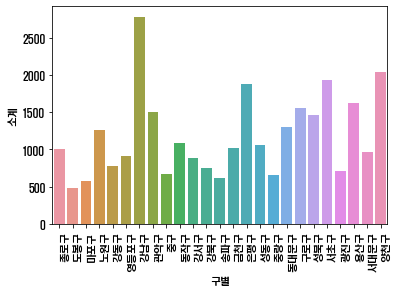

In [22]:
ax=sns.barplot(x='구별',y='소계',data=df_cctv)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="right",rotation_mode='anchor')

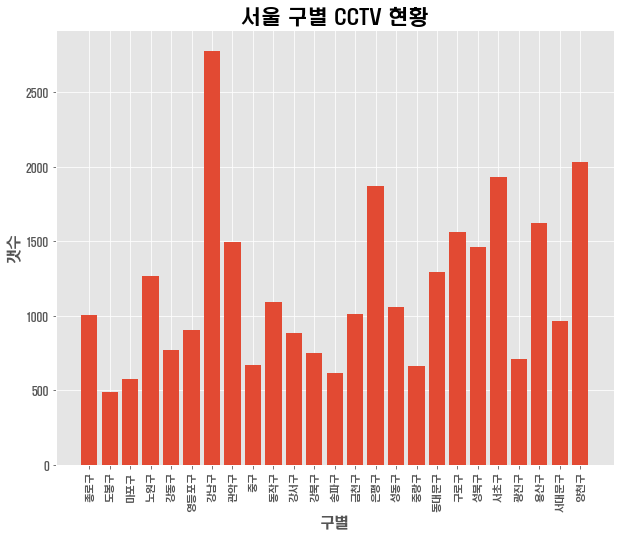

In [23]:
import matplotlib.pyplot as plt
# 그래프 크기 설정
plt.figure(figsize=(10, 8))

# 그래프 스타일 설정
plt.style.use('ggplot')

# 그래프 그리드 설정
plt.grid(True)

# 그래프 타이틀 및 x축, y축 설정
plt.title("서울 구별 CCTV 현황", fontsize=20)
plt.xlabel("구별", fontsize=15)
plt.ylabel("갯수", fontsize=15)

# x축 라벨 90도 회전시키기
plt.xticks(rotation='vertical')

# 그래프를 선정하고 그림을 그릴 x축과 y축 열이름 적기
plt.bar(df_cctv['구별'], df_cctv['소계'])

# 실제 적용하여 그림을 그리기
plt.show()

In [24]:
df_cctv.sort_values('소계',ascending=False,inplace=True)

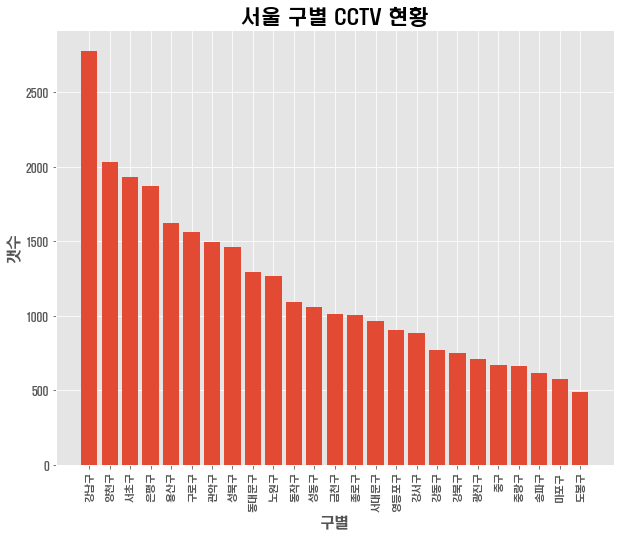

In [25]:
import matplotlib.pyplot as plt
# 그래프 크기 설정
plt.figure(figsize=(10, 8))

# 그래프 스타일 설정
plt.style.use('ggplot')

# 그래프 그리드 설정
plt.grid(True)

# 그래프 타이틀 및 x축, y축 설정
plt.title("서울 구별 CCTV 현황", fontsize=20)
plt.xlabel("구별", fontsize=15)
plt.ylabel("갯수", fontsize=15)

# x축 라벨 90도 회전시키기
plt.xticks(rotation='vertical')

# 그래프를 선정하고 그림을 그릴 x축과 y축 열이름 적기
plt.bar(df_cctv['구별'], df_cctv['소계'])

# 실제 적용하여 그림을 그리기
plt.show()

In [26]:
df_pop['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [27]:
df_pop.dropna(inplace=True)

In [28]:
df_pop['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [29]:
df_pop.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [30]:
df_pop['외국인비율']=df_pop['외국인']/df_pop['인구수']*100

In [31]:
df_pop['고령자비율']=df_pop['고령자']/df_pop['인구수']*100

In [32]:
df_pop.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [33]:
df_pop.sort_values('외국인비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [34]:
df_pop.sort_values('고령자비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


In [35]:
# 외국인 비율이 많은 지역 5군데를 나타내시오
pop_sort1 = df_pop.sort_values(by='외국인비율', ascending=False)

# 고령자 비율이 많은 지역 5군데를 나타내시오
pop_sort2 = df_pop.sort_values(by='고령자비율', ascending=False)

# 인구수가 많은 지역순으로 5군데 나타내기
pop_sort3 = df_pop.sort_values(by='인구수', ascending=False)

# 외국인이 많은 지역순으로 5군데 나타내기
pop_sort4 = df_pop.sort_values(by='외국인', ascending=False)

# 고령자가 많은 지역순으로 5군데 나타내기
pop_sort5 = df_pop.sort_values(by='고령자', ascending=False)

display(pop_sort1)
display(pop_sort2)
display(pop_sort3)
display(pop_sort4)
display(pop_sort5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
8,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
7,중랑구,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
8,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
25,강동구,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
22,서초구,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797
20,동작구,412520.0,400456.0,12064.0,56013.0,2.924464,13.578251
8,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
8,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,중랑구,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885
20,동작구,412520.0,400456.0,12064.0,56013.0,2.924464,13.578251


In [36]:
## 그래프 그리기
# 각 구별 인구수를 바 그래프로 그리기
# 그래프 크기 설정
plt.figure(figsize=(10, 8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

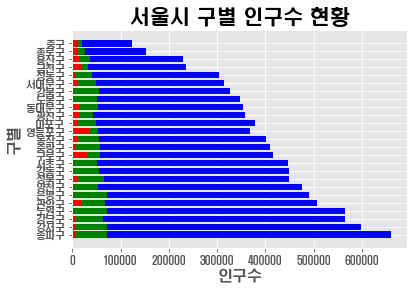

In [37]:
# 그래프 스타일 설정
plt.style.use('ggplot')

# 그래프 그리드 설정
plt.grid(True)

# 그래프 타이틀 및 x축, y축 설정
plt.title("서울시 구별 인구수 현황", fontsize=20)
plt.xlabel("인구수", fontsize=15)
plt.ylabel("구별", fontsize=15)

# x축 라벨 90도 회전시키기 : bar일때는 적용하고 barh일때는 적용하지 않는다
#plt.xticks(rotation='vertical')

# 그래프를 선정하고 그림을 그릴 x축과 y축 열이름 적기
plt.barh(pop_sort3['구별'], pop_sort3['한국인'], color='b')
plt.barh(pop_sort3['구별'], pop_sort3['고령자'], color='g')
plt.barh(pop_sort3['구별'], pop_sort3['외국인'], color='r')

# 실제 적용하여 그림을 그리기
plt.show()


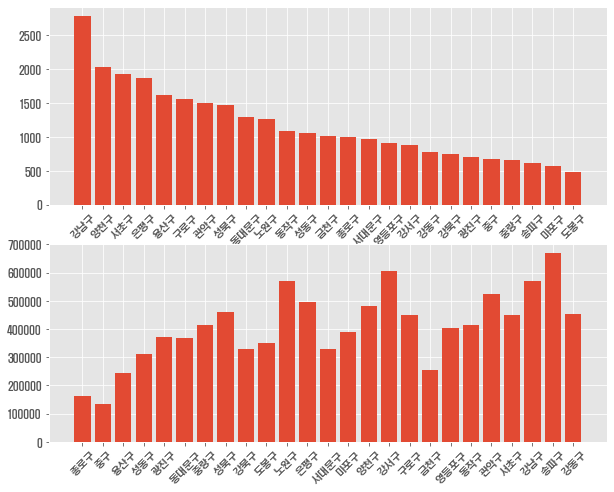

In [38]:
fig=plt.figure(figsize=(10,8))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)

ax1.bar(df_cctv['구별'],df_cctv['소계'])
ax2.bar(df_pop['구별'],df_pop['인구수'])
ax1.tick_params (axis = 'x', labelrotation =45)
ax2.tick_params (axis = 'x', labelrotation =45)

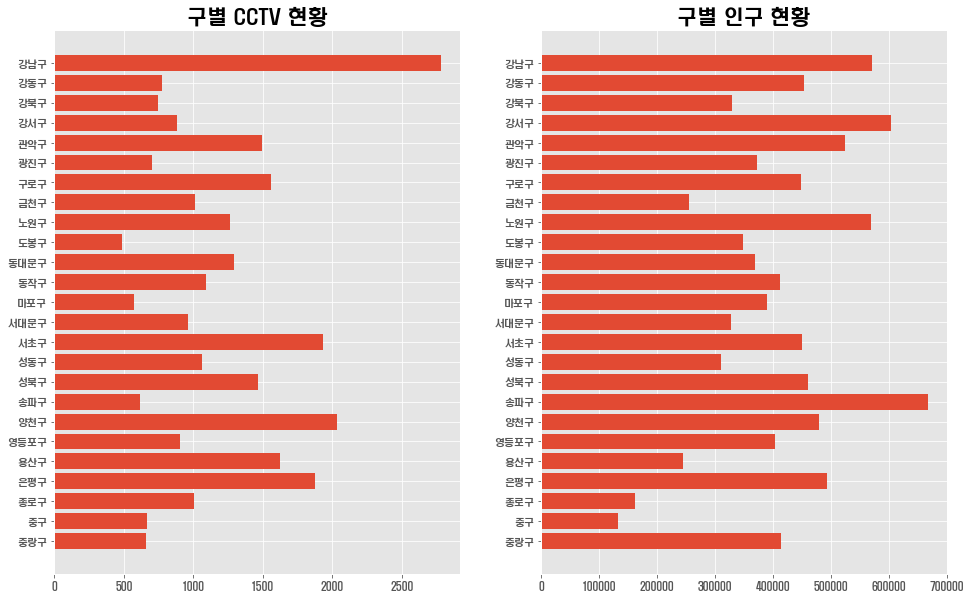

In [55]:
## 화면을 2개로 나누어서 한 화면에는 구별 CCTV 현황을
## 다른 화면에는 구별 인구수를 나타내는 그래프를 그리세요
flg = plt.figure(figsize=(16, 10))
ax1 = flg.add_subplot(1, 2, 1)
ax2 = flg.add_subplot(1, 2, 2)

CCTV_sort = df_cctv.sort_values(by='구별', ascending=False)
pop_sort = df_pop.sort_values(by='구별', ascending=False)

ax1.barh(CCTV_sort['구별'], CCTV_sort['소계'])
ax2.barh(pop_sort['구별'], pop_sort['인구수'])

ax1.set_title("구별 CCTV 현황", fontsize=20)
ax2.set_title("구별 인구 현황", fontsize=20)

plt.show()


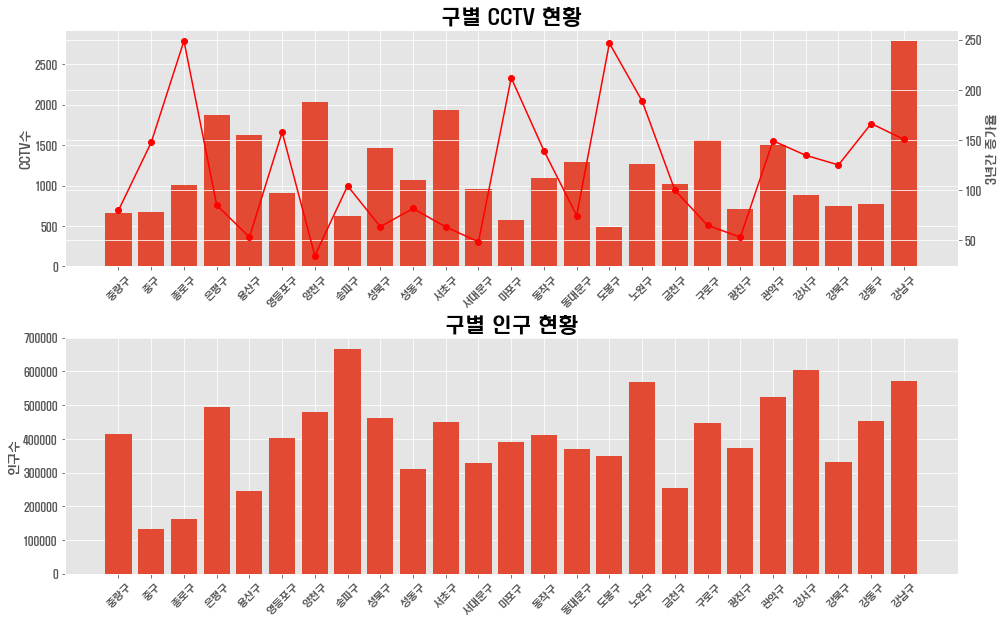

In [56]:
## CCTV화면에 소계는 막대그래프로, 증가율은 선그래프로 나타내기
flg = plt.figure(figsize=(16, 10))
ax1 = flg.add_subplot(2, 1, 1)
ax3 = flg.add_subplot(2, 1, 2)
plt.subplots_adjust(hspace=0.3)

ax1.bar(CCTV_sort['구별'], CCTV_sort['소계'])
ax2 = ax1.twinx()
ax2.plot(CCTV_sort['구별'], CCTV_sort['3년간 증가율'], marker='o', color='r')
ax3.bar(pop_sort['구별'], pop_sort['인구수'])

ax1.set_title("구별 CCTV 현황", fontsize=20)
ax3.set_title("구별 인구 현황", fontsize=20)

ax1.tick_params (axis = 'x', labelrotation =45)
ax2.tick_params (axis = 'x', labelrotation =45)
ax3.tick_params (axis = 'x', labelrotation =45)

ax1.set_ylabel("CCTV수")
ax2.set_ylabel("3년간 증가율")
ax3.set_ylabel("인구수")
fig = plt.gcf()
fig.savefig('graph.png', dpi=fig.dpi)
plt.show()

## 두 데이터 프레임을 합쳐보자

In [41]:
data_result=pd.merge(df_cctv, df_pop,on='구별')

In [42]:
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,3년간 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,양천구,2034,1843,142,30,467,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
2,서초구,1930,1406,157,336,398,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
3,은평구,1873,1138,224,278,468,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
4,용산구,1624,1368,218,112,398,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [43]:
data_result=data_result.drop(data_result.iloc[:,2:6],axis=1)

In [44]:
data_result.head()

,구별,소계,3년간 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
2,서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
3,은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
4,용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [45]:
data_result.set_index('구별')

,소계,3년간 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
성북구,1464,63.627354,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
동대문구,1294,74.766355,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


# 상관관계
## 상관관계를 분석해보자!

- 고령자비율, 외국인비율, 인구수대비 CCTV와 상관이 있는지 본다.
- 상관계수의 절대값이 클수록 두 데이터는 관계가 있다고 본다.
- 절대값이 0.1이하면 무시,
- 절대값이 0.3이하면 '약한 상관 관계',
- 절대값이 0.7이하면 '뚜렷한 상관관계'라고 한다.
- 위의 3가지의 상관관계를 구해서 가장 큰 값으로 데이터를 비교하여 보자
- 상관관계 명령어 : numpy의 corrcoef()함수를 이용하면 되고, 결과의 대각 1을 빼고 나머지를 비교하면 된다.

In [46]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [47]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [48]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

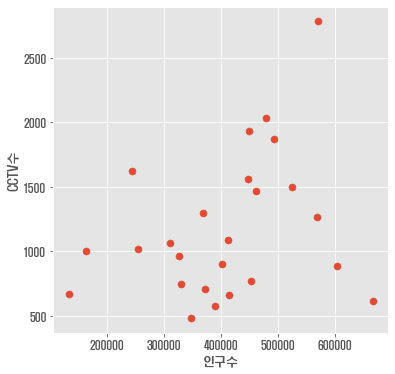

In [49]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'],s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.grid(True)
plt.show()

## 인구수와 CCTV의 관계를 대표하는 직선그리기
- numpy의 polyfit 함수를 이용하여 그린다.

In [50]:
fp1=np.polyfit(data_result['인구수'], data_result['소계'],1)
fp1

array([1.30916415e-03, 6.45066497e+02])

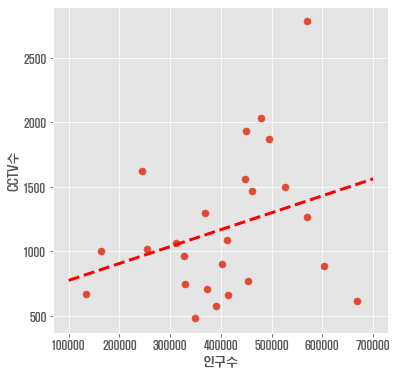

In [51]:
fy=np.poly1d(fp1)#직선그래프의 방적식구해주는 함수
fx=np.linspace(100000,700000,100)
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'],s=50)
plt.plot(fx,fy(fx), ls='dashed',lw=3,color='r')
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.grid(True)
plt.show()

In [52]:
#직선과 멀리 떨어져있는 곳의 구를 표시
#직선과 멀리 떨어질수록 다른 색으로 표시하기
# 오차구히기

In [53]:
data_result['오차']=np.abs(data_result['소계']-fy(data_result['인구수']))
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,구별,소계,3년간 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,1388.055355
22,송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,900.911312
1,양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,760.563512
2,서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,695.403794
4,용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,659.231690


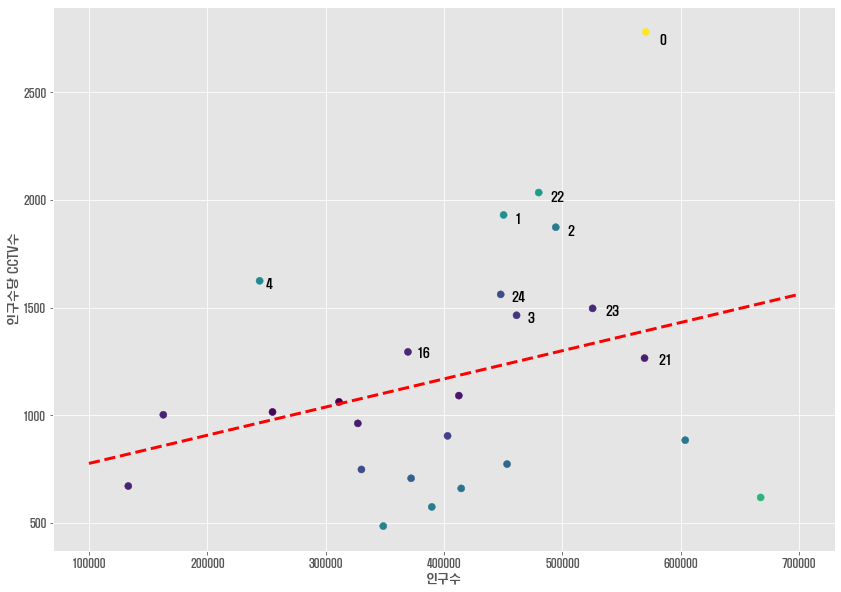

In [54]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'],data_result['소계'],s=50,c=data_result['오차'])
plt.plot(fx,fy(fx), ls='dashed',lw=3,color='r')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02,
            df_sort['소계'][n]*0.98,
            df_sort.index[n],
            fontsize=12)

plt.xlabel('인구수')
plt.ylabel('인구수당 CCTV수')
plt.grid(True)
plt.show()